<a href="https://colab.research.google.com/github/nguyentrong-phuc/BAI_TAP_NHAN_DIEN_ANH/blob/main/Food_vietnamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/AI/BTVN/Food

/content/drive/MyDrive/AI/BTVN/Food


In [3]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training=train_data.flow_from_directory('/content/drive/MyDrive/AI/BTVN/Food/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 3008 images belonging to 10 classes.


In [5]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/BTVN/Food/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 360 images belonging to 10 classes.


In [7]:
training.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [8]:
validation.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [9]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [14]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training,epochs=20,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/20
94/94 [==============================] - 512s 5s/step - loss: 0.8615 - accuracy: 0.7104 - val_loss: 0.9928 - val_accuracy: 0.6639
Epoch 2/20
94/94 [==============================] - 511s 5s/step - loss: 0.7772 - accuracy: 0.7450 - val_loss: 0.8283 - val_accuracy: 0.7167
Epoch 3/20
94/94 [==============================] - 518s 6s/step - loss: 0.6897 - accuracy: 0.7733 - val_loss: 0.9265 - val_accuracy: 0.7028
Epoch 4/20
94/94 [==============================] - 512s 5s/step - loss: 0.5995 - accuracy: 0.7909 - val_loss: 0.8007 - val_accuracy: 0.7167
Epoch 5/20
94/94 [==============================] - 510s 5s/step - loss: 0.6115 - accuracy: 0.7999 - val_loss: 0.9044 - val_accuracy: 0.7111
Epoch 6/20
94/94 [==============================] - 510s 5s/step - loss: 0.5150 - accuracy: 0.8295 - val_loss: 0.8440 - val_accuracy: 0.7250
Epoch 7/20
94/94 [==============================] - 510s 5s/step - loss: 0.4830 - accuracy: 0.8447 - val_loss: 0.8183 - val_accuracy: 0.7528
Epoch 8/20
94

In [15]:
# Lưu 
model.save("Food_VN.h5")
model_1=load_model('Food_VN.h5')

In [16]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.11670016497373581
Train Accuracy 0.9614361524581909


<function matplotlib.pyplot.show(*args, **kw)>

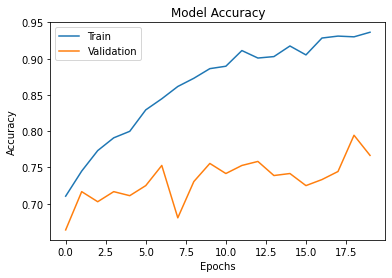

In [17]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 0s 60ms/step
BANH MI


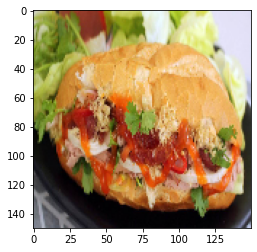

1/1 [==============================] - 0s 60ms/step
BANH MI


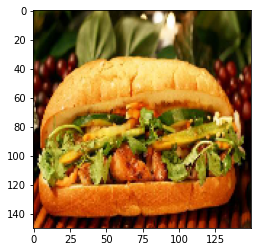

1/1 [==============================] - 0s 57ms/step
NEM


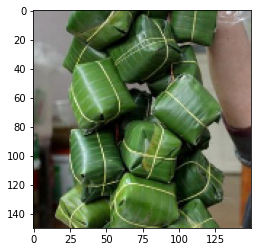

1/1 [==============================] - 0s 56ms/step
BANH TET


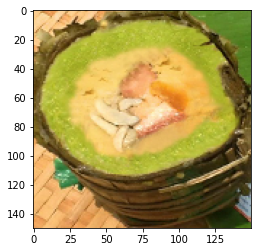

1/1 [==============================] - 0s 77ms/step
BANH PIA


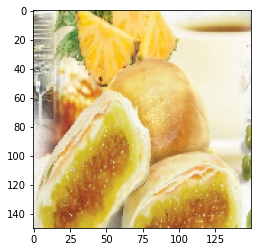

1/1 [==============================] - 0s 61ms/step
BANH CUON


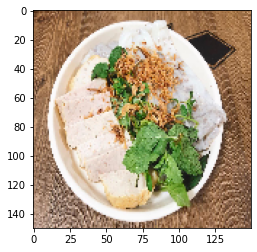

1/1 [==============================] - 0s 85ms/step
PHO


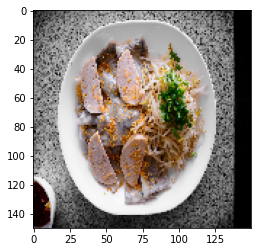

1/1 [==============================] - 0s 70ms/step
BANH XEO


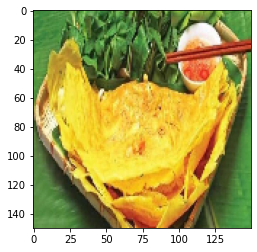

1/1 [==============================] - 0s 56ms/step
NEM


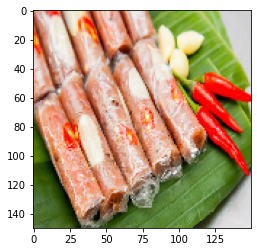

1/1 [==============================] - 0s 58ms/step
BANH TET


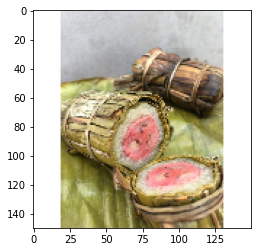

1/1 [==============================] - 0s 57ms/step
CA KHO TO


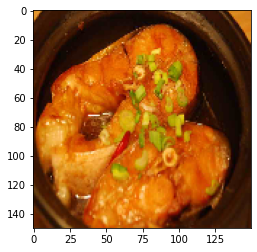

1/1 [==============================] - 0s 57ms/step
CA KHO TO


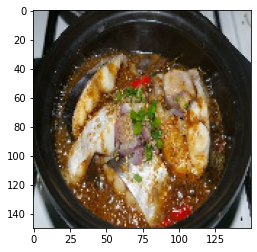

1/1 [==============================] - 0s 61ms/step
BANH PIA


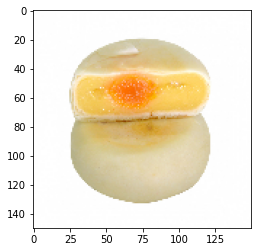

In [26]:
test="/content/drive/MyDrive/AI/BTVN/Food/Test/Test2"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['BANH CUON','BANH MI','BANH PIA','BANH TET','BANH XEO','BUN DAU MAM TOM','CA KHO TO','COM TAM','NEM','PHO']
  print(class_name[result])
  plt.show()